In [13]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [64]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Load dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extract features and labels
train_data = dataset["train"]
test_data = dataset["test"]

X_train_data = train_data["tokens"]
y_train_data = train_data["ner_tags"]

X_test_data = test_data["tokens"]
y_test_data = test_data["ner_tags"]

# Convert tokens into strings
X_train_data = [' '.join(tokens) for tokens in X_train_data]
X_test_data = [' '.join(tokens) for tokens in X_test_data]

# Convert multi-labels to binary format
labels = ['B-O','B-AC','B-LF','I-LF']
mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train_data)
y_test_binarized = mlb.transform(y_test_data)

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

def create_fasttext_fnn_model(vocab_size, embedding_dim, output_dim, num_classes, hidden_layers, hidden_units, activation='relu'):
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

    # Global Average Pooling layer
    model.add(GlobalAveragePooling1D())

    # Hidden layers
    for _ in range(hidden_layers):
        model.add(Dense(hidden_units, activation=activation))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Example usage:
vocab_size = 10000  # Example vocabulary size
embedding_dim = 100  # Example embedding dimension
output_dim = 1  # Example output dimension
num_classes = 4  # Adjusted number of classes
hidden_layers = 2  # Example number of hidden layers
hidden_units = 64  # Example number of units in each hidden layer

# Calculate the maximum length of input sequences
max_length = max(len(seq) for seq in X_train_data)

model = create_fasttext_fnn_model(vocab_size, embedding_dim, output_dim, num_classes, hidden_layers, hidden_units)
model.summary()


from sklearn.model_selection import ParameterGrid

def create_hyperparameter_grid():
    param_grid = {
        'embedding_dim': [50, 100, 200],
        'hidden_layers': [1, 2, 3],
        'hidden_units': [32, 64, 128],
        'activation': ['relu', 'tanh']
    }

    return list(ParameterGrid(param_grid))

# Example usage:
hyperparameter_grid = create_hyperparameter_grid()
print("Total combinations:", len(hyperparameter_grid))
for params in hyperparameter_grid:
    print(params)
  


/user/HS400/dd00830/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_7      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Total combinations: 54
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 1, 'hidden_units': 32}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 1, 'hidden_units': 64}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 1, 'hidden_units': 128}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 2, 'hidden_units': 32}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 2, 'hidden_units': 64}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 2, 'hidden_units': 128}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 3, 'hidden_units': 32}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 3, 'hidden_units': 64}
{'activation': 'relu', 'embedding_dim': 50, 'hidden_layers': 3, 'hidden_units': 128}
{'activation': 'relu', 'embedding_dim': 100, 'hidden_layers': 1, 'hidden_units': 32}
{'activation': 'relu', 'embedding_dim': 100, 'hidden_layers': 1, 'hidden_units': 64}
{'activation': 'relu', 'embedding_dim': 100, 'hi

In [45]:
print("Binarized train labels shape:", y_train_binarized.shape)
print("Binarized test labels shape:", y_test_binarized.shape)
print("Classes found by MultiLabelBinarizer:", mlb.classes_)


Binarized train labels shape: (1072, 4)
Binarized test labels shape: (153, 4)
Classes found by MultiLabelBinarizer: ['B-AC' 'B-LF' 'B-O' 'I-LF']


In [47]:
# Check what classes correspond to what indices
print("Index-to-class mapping:", mlb.classes_)


Index-to-class mapping: ['B-AC' 'B-LF' 'B-O' 'I-LF']


In [59]:
from sklearn.preprocessing import label_binarize

# Assuming classes [0, 1, 2, 3] correspond to your model's output classes
y_pred_binarized = label_binarize(y_pred_classes, classes=[0, 1, 2, 3])


In [58]:
print("Classification Report:")
print(classification_report(y_test_binarized, y_pred_binarized, target_names=mlb.classes_))


Classification Report:
              precision    recall  f1-score   support

        B-AC       0.86      1.00      0.92       131
        B-LF       0.00      0.00      0.00       113
         B-O       0.00      0.00      0.00       153
        I-LF       0.00      0.00      0.00       100

   micro avg       0.86      0.26      0.40       497
   macro avg       0.21      0.25      0.23       497
weighted avg       0.23      0.26      0.24       497
 samples avg       0.86      0.25      0.38       497



/user/HS400/dd00830/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
print("Confusion Matrix:-")
print(confusion_matrix(y_true_classes, y_pred_classes))


Confusion Matrix:-
[[131   0]
 [ 22   0]]


In [60]:
print("Accuracy Score:-")
print(accuracy_score(y_true_classes, y_pred_classes))

Accuracy Score:-
0.8562091503267973


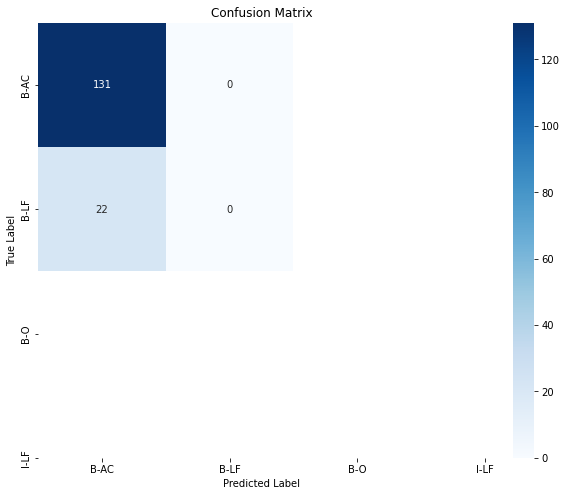

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
